# Project: Energy Production, Consumption and CO<sub>2</sub> Emission Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In this project, I'll be analysing data associated with total energy produced and consumed in different countries over about two decades, and the Consumption CO2 per capita for the people in the countries. 

**Project Aim**

The main aim of this project it to explore trends on energy production, consumption and CO<sub>2</sub> emissions within two decades from around the world. The research questions include:

* Which countries are the top and least energy producers?
* Which countries consume the most and least energy?
* Which countries are the highest and lowest CO<sub>2</sub> emitters?

> **3 datasets where used:**: 
* **Energy Production dataset** - `energy_production_total.csv`. Description: Energy production refers to forms of primary energy--petroleum (crude oil, natural gas liquids, and oil from nonconventional sources), natural gas, solid fuels (coal, lignite, and other derived fuels), and combustible renewables and waste--and primary electricity, all converted into tonnes of oil equivalents. 
     > 
     * Unit of measurement: Tonnes of oil equivalent (toe)
     > 
     * Source: [World Bank, 2010](https://data.worldbank.org/indicator/EG.EGY.PROD.KT.OE)  
     > 
* **Energy Consumption dataset** - `'energy_use_per_person.csv`. Description: Energy use refers to use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport.
     > 
     * Unit of measurement: Kg of oil equivalent per capita
     > 
     * Source: [World Bank, 2015](https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE)
     > 
* **Consumption CO<sub>2</sub> per capita dataset** - `consumption_emissions_tonnes_per_person.csv`. Description: Per capita carbon dioxide emissions from the fossil fuel consumption, cement production and gas flaring, minus export, plus import during the given year.
     > 
     * Unit of measurement: Metric tons of CO2 per person
     > 
     * Source: [Gapminder](https://github.com/open-numbers/ddf--gapminder--co2_emission)


In [1]:
# Setting up import statements for all of the packages that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section, I load the datasets, and explore them for cleanliness, and then trim and clean the datasets for analysis based on the observations made. For each dataset, I cleaned completely before moving to the next dataset.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [3]:
#Loading energy production dataset
df_energy_prod = pd.read_csv('energy_production_total.csv')
print(df_energy_prod.shape)
df_energy_prod.head(2)

(135, 52)


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.5k,51.4k,51.4k,57.6k,70.9k,80k,95k,106k,101k,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883,959,1050,1150,1170,1190,1060,1150,1250,NaN


In [4]:
#Loading energy consumption dataset
df_energy_usepp = pd.read_csv('energy_use_per_person.csv')
print(df_energy_usepp.shape)
df_energy_usepp.head(2)

(173, 57)


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459,472,492,515,521,522,552,534,545,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707,680,711,732,729,765,688,801,808,NaN


In [5]:
#Loading CO2 dataset
df_co2_consump = pd.read_csv('consumption_emissions_tonnes_per_person.csv')
print(df_co2_consump.shape)
df_co2_consump.head(3)

(119, 29)


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,1.71,1.39,0.875,0.824,0.729,0.792,0.926,0.707,0.808,...,2.04,2.14,2.08,2.17,2.08,2.02,2.17,1.96,1.9,1.96
1,United Arab Emirates,30.20,31.50,30.900,31.400,32.800,31.100,30.800,29.500,32.700,...,34.50,25.20,22.70,24.20,26.10,26.70,27.70,24.80,25.0,24.80
2,Argentina,3.20,3.40,3.520,3.420,3.480,3.490,3.670,3.820,3.830,...,4.41,4.07,4.33,4.47,4.48,4.58,4.62,4.70,4.6,4.59


In [6]:
#Checking for duplicates
df_energy_prod.duplicated()
# Exploring energy production dataset
df_energy_prod.describe()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,135,25,25,25,25,25,26,26,26,26,...,135,135,135,135,135,135,135,135,135,34
unique,135,25,25,25,25,25,26,26,26,25,...,126,129,133,126,129,129,128,130,129,34
top,South Korea,7360,4.9,6110,10000,6.45,2530,12.2k,44.9k,113k,...,1210,1550,136k,28.4k,280k,22.3k,22.1k,228k,1260,4900
freq,1,1,1,1,1,1,1,1,1,2,...,2,2,2,3,2,2,3,2,2,1


In [7]:
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 52 columns):
country    135 non-null object
1960       25 non-null object
1961       25 non-null object
1962       25 non-null object
1963       25 non-null object
1964       25 non-null object
1965       26 non-null object
1966       26 non-null object
1967       26 non-null object
1968       26 non-null object
1969       26 non-null object
1970       26 non-null object
1971       110 non-null object
1972       110 non-null object
1973       110 non-null object
1974       110 non-null object
1975       110 non-null object
1976       110 non-null object
1977       110 non-null object
1978       110 non-null object
1979       110 non-null object
1980       110 non-null object
1981       111 non-null object
1982       111 non-null object
1983       111 non-null object
1984       111 non-null object
1985       112 non-null object
1986       112 non-null object
1987       112 non-null object
1988   

In [8]:
#Checking for duplicates
print(df_energy_usepp.duplicated())
# Exploring energy consumption dataset
df_energy_usepp.describe()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
Length: 173, dtype: bool


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,173,25,25,25,25,25,26,26,26,26,...,171,171,141,141,141,141,141,141,135,34
unique,173,24,25,25,23,24,25,24,26,25,...,166,166,132,130,134,130,133,135,126,33
top,South Korea,1830,1990,4450,3280,434,3440,3070,2190,497,...,4050,1740,1030,3150,877,944,1070,1300,2030,2820
freq,1,2,1,1,2,2,2,2,1,2,...,2,2,3,3,2,3,3,2,3,2


In [9]:
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 57 columns):
country    173 non-null object
1960       25 non-null object
1961       25 non-null object
1962       25 non-null object
1963       25 non-null object
1964       25 non-null object
1965       26 non-null object
1966       26 non-null object
1967       26 non-null object
1968       26 non-null object
1969       26 non-null object
1970       26 non-null object
1971       112 non-null object
1972       112 non-null object
1973       112 non-null object
1974       112 non-null object
1975       112 non-null object
1976       112 non-null object
1977       112 non-null object
1978       112 non-null object
1979       112 non-null object
1980       112 non-null object
1981       113 non-null object
1982       113 non-null object
1983       113 non-null object
1984       113 non-null object
1985       114 non-null object
1986       114 non-null object
1987       114 non-null object
1988   

In [10]:
# Exploring CO2 dataset
df_co2_consump.describe()
#Checking for duplicates
print(df_co2_consump.duplicated())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
102    False
103    False
104    False
105    False
106    False
107    False
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
Length: 119, dtype: bool


In [11]:
df_co2_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 29 columns):
country    119 non-null object
1990       119 non-null float64
1991       119 non-null float64
1992       119 non-null float64
1993       119 non-null float64
1994       119 non-null float64
1995       119 non-null float64
1996       119 non-null float64
1997       119 non-null float64
1998       119 non-null float64
1999       119 non-null float64
2000       119 non-null float64
2001       119 non-null float64
2002       119 non-null float64
2003       119 non-null float64
2004       119 non-null float64
2005       119 non-null float64
2006       119 non-null float64
2007       119 non-null float64
2008       119 non-null float64
2009       119 non-null float64
2010       119 non-null float64
2011       119 non-null float64
2012       119 non-null float64
2013       119 non-null float64
2014       119 non-null float64
2015       119 non-null float64
2016       119 non-null float64


#### Observations 1
* In both energy produced and consumed datasets, 25-26 countries have enteries from 1960-1970. This is a really small number, compared to the 135 countries. 
* 2010 in energy production dataset and 2015 in energy consumption dataset both have 34 enteries
* Also, the CO2 consumption dataset has only enteries from 1990, and from 119 countries. We might be dropping the rows in both energy datasets from 1960-1970. 
* The values are float types, not integers
* Case type in country column needs to be changed (for uniformity)
* There is are a lot of missing values in multiple columns in the energy consumption dataset

First, let us look at what countries are featured in the first decade.

In [12]:
#exploring the countries with values in the first decade

not_nullprod = df_energy_prod[df_energy_prod["1964"].notnull()]
not_nulluse = df_energy_usepp[df_energy_usepp["1964"].notnull()]

print(not_nullprod['country'])
print(not_nulluse['country'])

5           Australia
6             Austria
8             Belgium
19             Canada
20        Switzerland
32            Germany
33            Denmark
39              Spain
42            Finland
43             France
45     United Kingdom
49             Greece
58            Ireland
61            Iceland
63              Italy
66              Japan
77         Luxembourg
91        Netherlands
92             Norway
94        New Zealand
100            Poland
102          Portugal
115            Sweden
123            Turkey
127     United States
Name: country, dtype: object
6           Australia
7             Austria
9             Belgium
24             Canada
25        Switzerland
39            Germany
42            Denmark
48              Spain
51            Finland
53             France
55     United Kingdom
62             Greece
73            Ireland
76            Iceland
78              Italy
81              Japan
97         Luxembourg
116       Netherlands
118            Norway
120

In [13]:
not_nullprod.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
100,Poland,64.8k,66.8k,68.7k,71.3k,75.7k,77.3k,79.9k,81.5k,85.8k,...,80.3k,80.2k,79.9k,78.8k,78.7k,77.6k,72.5k,71.4k,67.5k,67.8k
102,Portugal,1270,1320,1280,1320,1350,1370,1450,1470,1420,...,4100,3640,4340,3900,3610,4370,4650,4490,4890,5960
115,Sweden,5480,5930,6110,6000,6490,6770,6590,6930,6870,...,33.9k,31.8k,30.9k,34.3k,34.7k,32.8k,33.6k,33.2k,30.4k,32.5k
123,Turkey,9370,9480,9730,10.2k,10.6k,11.2k,12.2k,13.2k,13.5k,...,24.4k,24.1k,23.6k,24.1k,23.9k,26.4k,27.3k,29k,30.3k,30.3k
127,United States,965k,973k,1.01M,1.06M,1.1M,1.14M,1.2M,1.3M,1.34M,...,1.69M,1.66M,1.63M,1.65M,1.63M,1.65M,1.67M,1.7M,1.69M,1.74M


#### Observations 2
* The 25-26 countries that have enteries from 1960-1970 in both energy produced and consumed datasets are similar.
* Also, i can see that some values have K, decimal, and M. These figures for Energy Produced are measured in Tonnes of oil equivalent per capita. That is to say, that `17.6k` from Italy in 1968 is `17.6k tonnes of oil` and `1.34M` from USA in 1968 is `1.34 million tonnes of oil`.
* Case type in country column needs to be changed (for uniformity)

To do:
* Drop columns 1960-1970
* Change case type for the country column in all three datasets
* Explore 2010 column and 2015 column in the energy produced and energy consumed datasets respectively
* Change the values in the coulumns to integers, without k, M or decimal. `k` is interpreted as thousands while `M` is interpreted as million

### Cleaning Energy Production Dataset

In [14]:
#dropping columns that we don't need in df_energy_prod dataset
df_energy_prod.drop(['1960','1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989'], axis=1, inplace=True)


In [15]:
#changing case type for the country column in all three datasets
df_energy_prod['country'] = (df_energy_prod['country']
                             .str.lower()
                             .str.replace("-", "_")
                             .str.replace(" ", "_")
                             .str.replace(",","")
                             .str.replace(".","")
                            )

df_energy_usepp['country'] = (df_energy_usepp['country']
                             .str.lower()
                             .str.replace("-", "_")
                             .str.replace(" ", "_")
                             .str.replace(",","")
                             .str.replace(".","")
                            )
df_co2_consump['country'] = (df_co2_consump['country']
                             .str.lower()
                             .str.replace("-", "_")
                             .str.replace(" ", "_")
                             .str.replace(",","")
                             .str.replace(".","")
                            )

In [16]:
#verifying dropped columns and case types
df_energy_prod.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,angola,28.6k,30k,32.8k,30.5k,33k,36.4k,39.8k,41.6k,43k,...,43.5k,51.4k,51.4k,57.6k,70.9k,80k,95k,106k,101k,NaN
1,albania,2450,1920,1400,1330,1280,1240,1330,1100,1090,...,883,959,1050,1150,1170,1190,1060,1150,1250,NaN
2,united_arab_emirates,110k,127k,134k,131k,134k,137k,142k,147k,151k,...,152k,149k,163k,171k,174k,185k,186k,187k,169k,NaN
3,argentina,48.4k,50.2k,54.3k,57k,62.4k,66.9k,72k,77.5k,79.7k,...,84.5k,81.3k,84.3k,87.1k,84.7k,86.2k,82.9k,82.9k,80.8k,NaN
4,armenia,137,135,263,370,303,245,742,539,547,...,602,738,692,746,861,846,826,797,825,NaN


In [17]:
df_energy_prod.loc[83, :,]

country    malta
1990           0
1991           0
1992           0
1993           0
1994           0
1995           0
1996           0
1997           0
1998           0
1999           0
2000           0
2001           0
2002       0.239
2003        0.31
2004       0.406
2005       0.525
2006       0.645
2007       0.788
2008       0.907
2009        1.07
2010         NaN
Name: 83, dtype: object

In [18]:
#understanding missing values in 2010 
not_nullprod_2010 = df_energy_prod[df_energy_prod['2010'].notnull()]
not_nullprod_2010

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
5,australia,158k,167k,172k,175k,174k,187k,190k,201k,217k,...,254k,264k,264k,269k,280k,282k,299k,301k,311k,324k
6,austria,8110,8350,8560,8770,8400,8740,8630,8710,8880,...,9780,9820,9600,9900,10.1k,10.1k,10.9k,11.2k,11.4k,11.2k
8,belgium,13.1k,13k,12.7k,12.1k,11.6k,11.9k,12.4k,13.4k,13.1k,...,13.3k,13.5k,13.7k,13.8k,13.9k,13.8k,14.4k,14.5k,15.3k,15.3k
19,canada,274k,285k,294k,316k,339k,349k,358k,365k,365k,...,377k,384k,386k,398k,401k,411k,416k,406k,390k,396k
20,switzerland,10.3k,10.4k,10.6k,10.9k,11.4k,11.2k,10.8k,11.3k,11.4k,...,12.6k,12.2k,12.3k,12.1k,11k,12.2k,12.7k,12.8k,12.8k,12.7k
21,chile,7470,7890,8180,7780,7860,7850,7870,7910,7650,...,8610,8600,8100,8080,8870,9160,8500,9060,9300,9560
31,czech_republic,40.9k,38.6k,36.3k,35.8k,33.3k,32.4k,33.1k,33.5k,31.5k,...,31.4k,31.4k,33.5k,34.5k,32.9k,33.6k,33.8k,32.8k,31.2k,31.4k
32,germany,186k,168k,163k,152k,145k,145k,143k,144k,136k,...,135k,135k,136k,138k,135k,136k,138k,134k,127k,129k
33,denmark,10.1k,11.9k,12.9k,13.9k,15.1k,15.6k,17.7k,20.2k,20.4k,...,27.1k,28.6k,28.5k,31.1k,31.3k,29.6k,27.1k,26.6k,23.9k,23.2k
39,spain,34.6k,34.3k,33.7k,32.9k,32.3k,31.5k,32.7k,31.7k,32.3k,...,33.5k,31.8k,33k,32.6k,30.1k,31.3k,30.3k,30.4k,29.7k,33.9k


These are the exact countries that had figures for 1960-1970. They probably have better reporting methods. I am going to replace all the empty values in 2010 with 0

In [19]:
#dropping NaN values in 2010 column with 0
df_energy_prod.drop(['2010'], axis=1, inplace=True)

In [20]:
#confirming the fillna
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 21 columns):
country    135 non-null object
1990       132 non-null object
1991       133 non-null object
1992       134 non-null object
1993       134 non-null object
1994       134 non-null object
1995       135 non-null object
1996       135 non-null object
1997       135 non-null object
1998       135 non-null object
1999       135 non-null object
2000       135 non-null object
2001       135 non-null object
2002       135 non-null object
2003       135 non-null object
2004       135 non-null object
2005       135 non-null object
2006       135 non-null object
2007       135 non-null object
2008       135 non-null object
2009       135 non-null object
dtypes: object(21)
memory usage: 22.2+ KB


In [21]:
#removing Nan rows
df_energy_prod.dropna(inplace=True)
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 134
Data columns (total 21 columns):
country    132 non-null object
1990       132 non-null object
1991       132 non-null object
1992       132 non-null object
1993       132 non-null object
1994       132 non-null object
1995       132 non-null object
1996       132 non-null object
1997       132 non-null object
1998       132 non-null object
1999       132 non-null object
2000       132 non-null object
2001       132 non-null object
2002       132 non-null object
2003       132 non-null object
2004       132 non-null object
2005       132 non-null object
2006       132 non-null object
2007       132 non-null object
2008       132 non-null object
2009       132 non-null object
dtypes: object(21)
memory usage: 22.7+ KB


Now that the data set have been cleaned of NaN values, the next step is to eliminate the k, M and decimals in the values, and convert to `int` type.

To do:
* Make the country column an index column
* Assign all the columns to a variable
* Use the replace function to eliminate the k, M and decimals

In [22]:
#Setting index column
df_energy_prod =df_energy_prod.set_index('country')
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, angola to zimbabwe
Data columns (total 20 columns):
1990    132 non-null object
1991    132 non-null object
1992    132 non-null object
1993    132 non-null object
1994    132 non-null object
1995    132 non-null object
1996    132 non-null object
1997    132 non-null object
1998    132 non-null object
1999    132 non-null object
2000    132 non-null object
2001    132 non-null object
2002    132 non-null object
2003    132 non-null object
2004    132 non-null object
2005    132 non-null object
2006    132 non-null object
2007    132 non-null object
2008    132 non-null object
2009    132 non-null object
dtypes: object(20)
memory usage: 21.7+ KB


In [23]:
df_energy_prod.loc['malta', :,]

1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002    0.239
2003     0.31
2004    0.406
2005    0.525
2006    0.645
2007    0.788
2008    0.907
2009     1.07
Name: malta, dtype: object

In [24]:
df_energy_prod.loc['gibraltar', :,]

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
Name: gibraltar, dtype: object

In [25]:
# dropping gibraltar
df_energy_prod.drop(['gibraltar'], inplace=True)

In [26]:
cols1 = df_energy_prod.columns
cols1

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009'],
      dtype='object')

In [27]:
#Addressing k, M and the decimal, and ensuring that the values are integers
df_energy_prod = df_energy_prod[cols1].replace({'k': '*1e3', 'M': '*1e6', }, regex=True).applymap(pd.eval).round().astype(int)
df_energy_prod.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,
angola,28600,30000,32800,30500,33000,36400,39800,41600,43000,43500,43700,43500,51400,51400,57600,70900,80000,95000,106000,101000
albania,2450,1920,1400,1330,1280,1240,1330,1100,1090,1070,986,883,959,1050,1150,1170,1190,1060,1150,1250
united_arab_emirates,110000,127000,134000,131000,134000,137000,142000,147000,151000,143000,156000,152000,149000,163000,171000,174000,185000,186000,187000,169000
argentina,48400,50200,54300,57000,62400,66900,72000,77500,79700,80100,82300,84500,81300,84300,87100,84700,86200,82900,82900,80800
armenia,137,135,263,370,303,245,742,539,547,646,632,602,738,692,746,861,846,826,797,825


In [28]:
# Verifying changes
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, angola to zimbabwe
Data columns (total 20 columns):
1990    131 non-null int64
1991    131 non-null int64
1992    131 non-null int64
1993    131 non-null int64
1994    131 non-null int64
1995    131 non-null int64
1996    131 non-null int64
1997    131 non-null int64
1998    131 non-null int64
1999    131 non-null int64
2000    131 non-null int64
2001    131 non-null int64
2002    131 non-null int64
2003    131 non-null int64
2004    131 non-null int64
2005    131 non-null int64
2006    131 non-null int64
2007    131 non-null int64
2008    131 non-null int64
2009    131 non-null int64
dtypes: int64(20)
memory usage: 21.5+ KB


In [29]:
df_energy_prod.loc['malta', :,]

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    1
2006    1
2007    1
2008    1
2009    1
Name: malta, dtype: int64

### Cleaning Energy Consumption Dataset

> To clean the energy consumption dataset, I repeated an adapted version of the steps used to clean the energy production dataset. The steps are as follows:
* Drop columns from 1960-1989
* Explore missing values in 2015
* Eliminate the k, M and decimals in the values by:
 * Make the country column an index column
 * Assign all the columns to a variable
 * Use the replace function to eliminate the k, M and decimals
* Convert values to`int` type
* Adressing incomplete columns

In [30]:
#overview of the energy use dataset
df_energy_usepp.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459,472,492,515,521,522,552,534,545,NaN
1,albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707,680,711,732,729,765,688,801,808,NaN
2,united_arab_emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8720,8130,8370,7570,7220,7190,7480,7600,7650,NaN


In [31]:
#dropping columns that we don't need to allign with the production dataset
df_energy_usepp.drop(['1960','1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', 
                      '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', 
                      '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989','2010', '2011', '2012', 
                      '2013', '2014', '2015'], axis=1, inplace=True)

df_energy_usepp.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,angola,497,492,479,480,471,456,454,449,434,...,439,443,448,468,465,434,459,472,492,515
1,albania,813,573,418,412,441,417,448,385,427,...,580,597,660,648,715,720,707,680,711,732
2,united_arab_emirates,11.2k,12.1k,10.9k,10.8k,11.4k,11.5k,11.5k,11.6k,11.2k,...,10.1k,12.2k,11.5k,10.6k,10.3k,9700,8720,8130,8370,7570


In [32]:
#exploring energy use dataset
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
country    173 non-null object
1990       161 non-null object
1991       135 non-null object
1992       135 non-null object
1993       135 non-null object
1994       135 non-null object
1995       137 non-null object
1996       137 non-null object
1997       137 non-null object
1998       137 non-null object
1999       137 non-null object
2000       140 non-null object
2001       140 non-null object
2002       140 non-null object
2003       140 non-null object
2004       170 non-null object
2005       171 non-null object
2006       171 non-null object
2007       171 non-null object
2008       141 non-null object
2009       141 non-null object
dtypes: object(21)
memory usage: 28.5+ KB


#### Observations 3
The `2015` column, just like the 2010 column in the `df_energy prod` dataset has only 34 `not.null` columns.

Also, not one of the columns has complete data and to filter out the rows based on this will leave my dataset empty. First, I will find out if the countries in with values in 2015 for the `df_energy_usepp` and 2010 for the `df_energy prod` are the same. Second, I will fill the NaN values with zero.

#### Observations 3
Not one of the columns has complete data 

and to filter out the rows based on this will leave my dataset empty. First, I will find out if the countries in with values in 2015 for the `df_energy_usepp` and 2010 for the `df_energy prod` are the same. Second, I will fill the NaN values with zero.

These are the same countries from the other dataset. I will replace the NaN values in 2015 and other columns with zero

In [33]:
#removing Nan rows
df_energy_usepp.dropna(inplace=True)
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 172
Data columns (total 21 columns):
country    133 non-null object
1990       133 non-null object
1991       133 non-null object
1992       133 non-null object
1993       133 non-null object
1994       133 non-null object
1995       133 non-null object
1996       133 non-null object
1997       133 non-null object
1998       133 non-null object
1999       133 non-null object
2000       133 non-null object
2001       133 non-null object
2002       133 non-null object
2003       133 non-null object
2004       133 non-null object
2005       133 non-null object
2006       133 non-null object
2007       133 non-null object
2008       133 non-null object
2009       133 non-null object
dtypes: object(21)
memory usage: 22.9+ KB


In [34]:
##Exploring Usepp to verify complete columns
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 172
Data columns (total 21 columns):
country    133 non-null object
1990       133 non-null object
1991       133 non-null object
1992       133 non-null object
1993       133 non-null object
1994       133 non-null object
1995       133 non-null object
1996       133 non-null object
1997       133 non-null object
1998       133 non-null object
1999       133 non-null object
2000       133 non-null object
2001       133 non-null object
2002       133 non-null object
2003       133 non-null object
2004       133 non-null object
2005       133 non-null object
2006       133 non-null object
2007       133 non-null object
2008       133 non-null object
2009       133 non-null object
dtypes: object(21)
memory usage: 22.9+ KB


Now to address the k, M, and decimals...

In [35]:
#Setting index column
df_energy_usepp = df_energy_usepp.set_index('country')

In [36]:
cols2 = df_energy_usepp.columns
cols2

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009'],
      dtype='object')

In [37]:
#Addressing the k, M, and decimals

df_energy_usepp = df_energy_usepp[cols2].replace({'k': '*1e3', 'M': '*1e6', }, regex=True).applymap(pd.eval).round().astype(int)

df_energy_usepp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,
angola,497,492,479,480,471,456,454,449,434,441,439,443,448,468,465,434,459,472,492,515
albania,813,573,418,412,441,417,448,385,427,576,580,597,660,648,715,720,707,680,711,732
united_arab_emirates,11200,12100,10900,10800,11400,11500,11500,11600,11200,10900,10100,12200,11500,10600,10300,9700,8720,8130,8370,7570
argentina,1410,1440,1490,1470,1550,1550,1590,1620,1660,1670,1670,1570,1510,1600,1730,1720,1850,1860,1940,1870
armenia,2180,2320,1200,652,420,511,562,594,610,594,656,657,618,656,698,843,865,973,1030,904


In [38]:
#Verifying changes
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, angola to zimbabwe
Data columns (total 20 columns):
1990    133 non-null int64
1991    133 non-null int64
1992    133 non-null int64
1993    133 non-null int64
1994    133 non-null int64
1995    133 non-null int64
1996    133 non-null int64
1997    133 non-null int64
1998    133 non-null int64
1999    133 non-null int64
2000    133 non-null int64
2001    133 non-null int64
2002    133 non-null int64
2003    133 non-null int64
2004    133 non-null int64
2005    133 non-null int64
2006    133 non-null int64
2007    133 non-null int64
2008    133 non-null int64
2009    133 non-null int64
dtypes: int64(20)
memory usage: 21.8+ KB


### Cleaning Consumption CO2 per capita Dataset

In [39]:
#Exploring CO2 dataset
df_co2_consump.tail()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
114,venezuela,4.390,4.230,3.970,4.320,4.210,4.250,3.700,4.090,4.860,...,4.870,5.620,5.860,5.360,6.120,5.730,5.70,5.230,4.900,4.770
115,vietnam,0.331,0.323,0.319,0.345,0.377,0.407,0.485,0.580,0.595,...,1.510,1.580,1.740,1.830,1.750,2.010,2.11,2.160,2.110,2.090
116,south_africa,5.600,5.740,5.040,5.010,5.250,5.280,5.140,5.200,4.960,...,6.850,7.010,6.490,6.620,6.490,6.360,6.50,6.110,6.120,5.980
117,zambia,0.443,0.444,0.433,0.445,0.435,0.437,0.406,0.519,0.457,...,0.506,0.454,0.418,0.507,0.465,0.559,0.59,0.562,0.573,0.574
118,zimbabwe,1.930,1.950,1.990,1.920,2.040,1.870,2.040,1.650,1.410,...,0.839,0.655,0.717,0.790,0.812,0.910,0.94,0.943,0.842,0.881


In [40]:
#Exploring CO2 dataset
df_co2_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 29 columns):
country    119 non-null object
1990       119 non-null float64
1991       119 non-null float64
1992       119 non-null float64
1993       119 non-null float64
1994       119 non-null float64
1995       119 non-null float64
1996       119 non-null float64
1997       119 non-null float64
1998       119 non-null float64
1999       119 non-null float64
2000       119 non-null float64
2001       119 non-null float64
2002       119 non-null float64
2003       119 non-null float64
2004       119 non-null float64
2005       119 non-null float64
2006       119 non-null float64
2007       119 non-null float64
2008       119 non-null float64
2009       119 non-null float64
2010       119 non-null float64
2011       119 non-null float64
2012       119 non-null float64
2013       119 non-null float64
2014       119 non-null float64
2015       119 non-null float64
2016       119 non-null float64


#### Observations
* The values have decimals, but they're float type
* There are no missing values
* There are no values with k, or M
* This dataset has columns up to 2017
* The dataset has 119 enteries, which is smaller than either of the previous ones

To do:
* Make the country column an index column,
* Change the values to int type.

In [41]:
df_co2_consump = df_co2_consump.set_index('country')

In [42]:
df_co2_consump = df_co2_consump.round(0).astype(int)

In [43]:
df_co2_consump.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, albania to zimbabwe
Data columns (total 28 columns):
1990    119 non-null int64
1991    119 non-null int64
1992    119 non-null int64
1993    119 non-null int64
1994    119 non-null int64
1995    119 non-null int64
1996    119 non-null int64
1997    119 non-null int64
1998    119 non-null int64
1999    119 non-null int64
2000    119 non-null int64
2001    119 non-null int64
2002    119 non-null int64
2003    119 non-null int64
2004    119 non-null int64
2005    119 non-null int64
2006    119 non-null int64
2007    119 non-null int64
2008    119 non-null int64
2009    119 non-null int64
2010    119 non-null int64
2011    119 non-null int64
2012    119 non-null int64
2013    119 non-null int64
2014    119 non-null int64
2015    119 non-null int64
2016    119 non-null int64
2017    119 non-null int64
dtypes: int64(28)
memory usage: 27.0+ KB


In [44]:
df_co2_consump.tail()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
venezuela,4,4,4,4,4,4,4,4,5,2,...,5,6,6,5,6,6,6,5,5,5
vietnam,0,0,0,0,0,0,0,1,1,1,...,2,2,2,2,2,2,2,2,2,2
south_africa,6,6,5,5,5,5,5,5,5,6,...,7,7,6,7,6,6,6,6,6,6
zambia,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,1,1,1
zimbabwe,2,2,2,2,2,2,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Observations
Converting the values to integers approximated the values, and in some cases, made the values zero. This is important especially for CO2 because consumption CO2 per capita is measured in metric tons of CO2 per person, and 1 unit of this has significant impact on the environment and climate change

<a id='eda'></a>
## Exploratory Data Analysis

### Top and Low Energy Producing Countries

#### Top Energy Producing Countries

In [45]:
#replacing zeros with NaN to ensure accurate mean, and account for missing values.
df_energy_prod = df_energy_prod.replace(0, np.NaN) 
#finding the mean of 2 decades of production
df_energy_prod['country_mean'] = df_energy_prod.mean(axis=1)
df_energy_prod.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,country_mean
country,,,,,,,,,,,,,,,,,,,,,
angola,28600.0,30000.0,32800.0,30500.0,33000.0,36400.0,39800.0,41600.0,43000.0,43500.0,...,43500.0,51400.0,51400.0,57600.0,70900,80000,95000,106000,101000,52985.0
albania,2450.0,1920.0,1400.0,1330.0,1280.0,1240.0,1330.0,1100.0,1090.0,1070.0,...,883.0,959.0,1050.0,1150.0,1170,1190,1060,1150,1250,1252.9
united_arab_emirates,110000.0,127000.0,134000.0,131000.0,134000.0,137000.0,142000.0,147000.0,151000.0,143000.0,...,152000.0,149000.0,163000.0,171000.0,174000,185000,186000,187000,169000,152400.0
argentina,48400.0,50200.0,54300.0,57000.0,62400.0,66900.0,72000.0,77500.0,79700.0,80100.0,...,84500.0,81300.0,84300.0,87100.0,84700,86200,82900,82900,80800,74275.0
armenia,137.0,135.0,263.0,370.0,303.0,245.0,742.0,539.0,547.0,646.0,...,602.0,738.0,692.0,746.0,861,846,826,797,825,574.6


In [46]:
#Exploring country mean
df_energy_prod['country_mean'].describe()

count    1.310000e+02
mean     7.748660e+04
std      2.138566e+05
min      1.000000e+00
25%      3.010375e+03
50%      1.335500e+04
75%      5.890750e+04
max      1.661000e+06
Name: country_mean, dtype: float64

In [47]:
df_energy_prod.query('country_mean == "0"')

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,country_mean
country,,,,,,,,,,,,,,,,,,,,,


In [51]:
#Grouping countries based on their mean energy production
bin_edges = [ 1.000000, 3010.375, 13355.00, 58907.50, 1661000.00 ]

In [52]:
# Labels for the four levels of production groups
bin_names = ['low producer','medium producer', 'high producer', 'top producer' ] 

In [53]:
# Creates prod_levels column
df_energy_prod['prod_levels'] = pd.cut(df_energy_prod['country_mean'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_energy_prod.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,prod_levels
country,,,,,,,,,,,,,,,,,,,,,
angola,28600.0,30000.0,32800.0,30500.0,33000.0,36400.0,39800.0,41600.0,43000.0,43500.0,...,51400.0,51400.0,57600.0,70900,80000,95000,106000,101000,52985.0,high producer
albania,2450.0,1920.0,1400.0,1330.0,1280.0,1240.0,1330.0,1100.0,1090.0,1070.0,...,959.0,1050.0,1150.0,1170,1190,1060,1150,1250,1252.9,low producer
united_arab_emirates,110000.0,127000.0,134000.0,131000.0,134000.0,137000.0,142000.0,147000.0,151000.0,143000.0,...,149000.0,163000.0,171000.0,174000,185000,186000,187000,169000,152400.0,top producer


In [54]:
#grouping top producers
top_prod = df_energy_prod.query('prod_levels == "top producer"')
top_prod = top_prod.sort_values(by = ['country_mean', 'country'], ascending = [False, True])
top_prod.head(6)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,prod_levels
country,,,,,,,,,,,,,,,,,,,,,
united_states,1650000.0,1640000.0,1650000.0,1600000.0,1660000.0,1660000.0,1680000.0,1680000.0,1690000.0,1670000.0,...,1660000.0,1630000.0,1650000.0,1630000,1650000,1670000,1700000,1690000,1661000.0,top producer
china,886000.0,895000.0,912000.0,941000.0,992000.0,1070000.0,1100000.0,1090000.0,1080000.0,1060000.0,...,1170000.0,1320000.0,1490000.0,1620000,1730000,1820000,1990000,2080000,1269800.0,top producer
russia,1290000.0,1220000.0,1140000.0,1060000.0,991000.0,968000.0,965000.0,933000.0,940000.0,962000.0,...,1050000.0,1120000.0,1170000.0,1200000,1230000,1240000,1250000,1180000,1094850.0,top producer
saudi_arabia,370000.0,466000.0,480000.0,473000.0,464000.0,467000.0,472000.0,467000.0,482000.0,445000.0,...,440000.0,515000.0,553000.0,581000,576000,555000,579000,528000,493100.0,top producer
india,292000.0,302000.0,306000.0,310000.0,321000.0,336000.0,342000.0,353000.0,352000.0,359000.0,...,384000.0,396000.0,410000.0,422000,438000,453000,468000,503000,374400.0,top producer
canada,274000.0,285000.0,294000.0,316000.0,339000.0,349000.0,358000.0,365000.0,365000.0,364000.0,...,384000.0,386000.0,398000.0,401000,411000,416000,406000,390000,362550.0,top producer


In [55]:
top_prod.index

Index(['united_states', 'china', 'russia', 'saudi_arabia', 'india', 'canada',
       'iran', 'indonesia', 'united_kingdom', 'australia', 'mexico',
       'venezuela', 'norway', 'nigeria', 'brazil', 'united_arab_emirates',
       'germany', 'south_africa', 'algeria', 'france', 'kuwait', 'japan',
       'kazakhstan', 'poland', 'ukraine', 'iraq', 'libya', 'malaysia',
       'argentina', 'colombia', 'egypt', 'netherlands', 'qatar'],
      dtype='object', name='country')

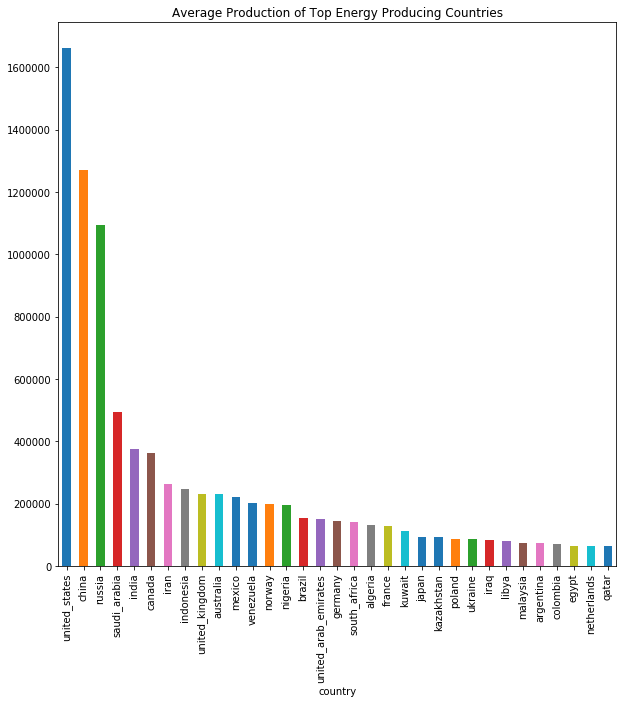

In [56]:
top_prod["country_mean"].plot(kind='bar', title='Average Production of Top Energy Producing Countries', figsize=(10,10))

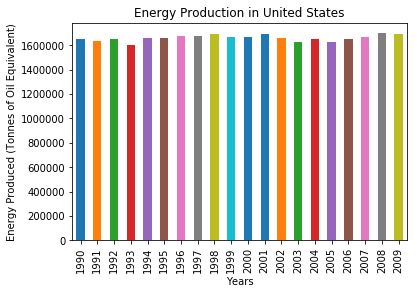

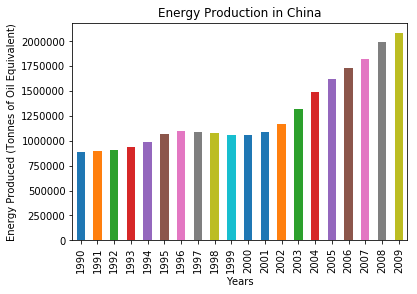

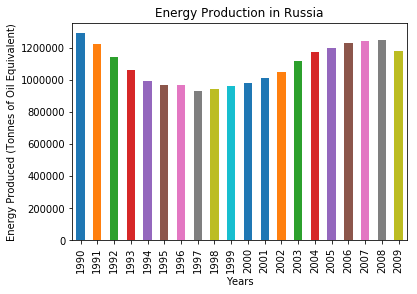

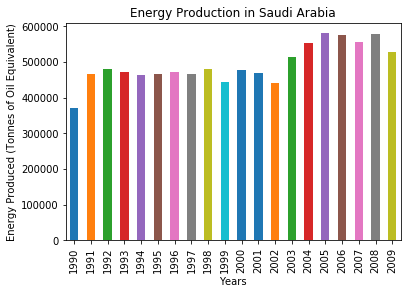

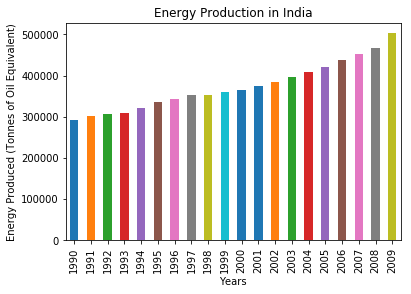

In [57]:
#plotting top 5 accross the years
united_states = top_prod.iloc[0, :-2]
united_states.plot(kind='bar', title='Energy Production in United States')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

china = top_prod.iloc[1, :-2]
china.plot(kind='bar', title='Energy Production in China')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

russia = top_prod.iloc[2, :-2]
russia.plot(kind='bar', title='Energy Production in Russia')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

saudi_arabia = top_prod.iloc[3, :-2]
saudi_arabia.plot(kind='bar', title='Energy Production in Saudi Arabia')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

india = top_prod.iloc[4, :-2]
india.plot(kind='bar', title='Energy Production in India')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

#### Observation 4
While countries like the USA and Russia have maintained production levels within the same range over the years, China and India have gradually increased their production over the years.

#### Low Energy Producing Countries

In [58]:
#finding the mean of 2 decades of production
low_prod = df_energy_prod.query('prod_levels == "low producer"')
low_prod = low_prod.sort_values(by = ['country_mean', 'country'], ascending = [True, False])
low_prod.head(6)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,prod_levels
country,,,,,,,,,,,,,,,,,,,,,
singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,...,34.0,28.0,27.0,46,34,25,32,29,27.583333,low producer
cyprus,6.0,6.0,5.0,5.0,12.0,42.0,43.0,42.0,43.0,44.0,...,45.0,48.0,50.0,51,52,73,83,85,41.150000,low producer
hong_kong_china,43.0,43.0,44.0,45.0,45.0,47.0,48.0,48.0,49.0,49.0,...,50.0,50.0,51.0,51,51,52,52,52,48.500000,low producer
luxembourg,29.0,30.0,46.0,44.0,45.0,45.0,37.0,42.0,53.0,53.0,...,56.0,58.0,67.0,88,92,95,101,106,60.100000,low producer
moldova,58.0,66.0,58.0,63.0,53.0,54.0,91.0,100.0,63.0,64.0,...,76.0,85.0,92.0,88,87,88,102,104,76.500000,low producer
lebanon,143.0,151.0,167.0,171.0,185.0,180.0,190.0,201.0,193.0,155.0,...,191.0,252.0,234.0,229,200,192,166,174,185.000000,low producer


In [59]:
low_prod.iloc[0, :-3]

1990    NaN
1991    NaN
1992    NaN
1993    NaN
1994    NaN
1995    NaN
1996    NaN
1997    NaN
1998     14
1999     15
2000     23
2001     24
2002     34
2003     28
2004     27
2005     46
2006     34
2007     25
2008     32
Name: singapore, dtype: object

In [ ]:
low_prod.index

Malta has too many missing values to make reasonable conclusions from. Instead, I focus on the next 5

In [ ]:
#plotting lowest 5 accross the years
malta = low_prod.iloc[0, :-3]
malta.plot(kind='bar', title='Energy Production in Malta')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

singapore = low_prod.iloc[1, :-3]
singapore.plot(kind='bar', title='Energy Production in Singapore')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

cyprus = low_prod.iloc[2, :-3]
cyprus.plot(kind='bar', title='Energy Production in Cyprus')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

hong_kong_china = low_prod.iloc[3, :-3]
hong_kong_china.plot(kind='bar', title='Energy Production in Hong Kong, China')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

luxembourg = low_prod.iloc[4, :-3]
luxembourg.plot(kind='bar', title='Energy Production in Luxembourg')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

moldova = low_prod.iloc[5, :-3]
moldova.plot(kind='bar', title='Energy Production in Moldova')
plt.xlabel('Years')
plt.ylabel('Energy Produced (Tonnes of Oil Equivalent)')
plt.show()

### Top and Low Energy Consumers

#### Top Energy Consumers

In [ ]:
#replacing zeros with NaN to ensure accurate mean, and account for missing values.
df_energy_usepp = df_energy_usepp.replace(0, np.NaN)
#finding the mean of 2 decades of energy consumption
df_energy_usepp['country_mean'] = df_energy_usepp.mean(axis=1)
df_energy_usepp.head(5)


In [ ]:
#Exploring country mean
df_energy_usepp['country_mean'].describe()

In [ ]:
#Grouping countries based on their mean energy production
bin_edgess = [ 11.593846, 482.452549, 1169.453459, 2818.461538, 17491.004779 ] # Fill in this list with five values

In [ ]:
# Labels for the four levels of production groups
bin_namess = ['low consumer','medium consumer', 'high consumer', 'top consumer' ] 

In [ ]:
# Creates prod_levels column
df_energy_usepp['usepp_levels'] = pd.cut(df_energy_usepp['country_mean'], bin_edgess, labels=bin_namess)

# Checks for successful creation of this column
df_energy_usepp.head(3)

In [ ]:
#grouping top producers
top_usepp = df_energy_usepp.query('usepp_levels == "top consumer"')
top_usepp = top_usepp.sort_values(by = ['country_mean', 'country'], ascending = [False, True]) # Sorting
top_usepp.head(6)

In [ ]:
top_usepp.index

In [ ]:
#plotting top 5 accross the years
curaçao = top_usepp.iloc[0, :-2]
curaçao.plot(kind='bar', title='Energy Consumption in Curaçao')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

iceland = top_usepp.iloc[1, :-2]
iceland.plot(kind='bar', title='Energy Consumption in Iceland')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()


bahrain = top_usepp.iloc[2, :-2]
bahrain.plot(kind='bar', title='Energy Consumption in Bahrain')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

united_arab_emirates = top_usepp.iloc[3, :-2]
united_arab_emirates.plot(kind='bar', title='Energy Consumption in United Arab Emirates')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

trinidad_and_tobago = top_usepp.iloc[4, :-2]
trinidad_and_tobago.plot(kind='bar', title='Energy Consumption in Trinidad and Tobago')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

#### Low Energy Consumers

In [ ]:
#finding the mean of 2 decades of energy consumption
low_usepp = df_energy_usepp.query('usepp_levels == "low consumer"')
low_usepp = low_usepp.sort_values(by = ['country_mean', 'country'], ascending = [True, False])
low_usepp.head()

In [ ]:
low_usepp.index
low_prod.iloc[0, :-3]

In [ ]:
#plotting lowest 5 accross the years
lesotho = low_usepp.iloc[0, :-2]
lesotho.plot(kind='bar', title='Energy Consumption in Lesotho')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

timor_leste = low_usepp.iloc[1, :-2]
timor_leste.plot(kind='bar', title='Energy Consumption in Timor-Leste')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

comoros = low_usepp.iloc[2, :-2]
comoros.plot(kind='bar', title='Energy Consumption in Comoros')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

south_sudan = low_usepp.iloc[3, :-2]
south_sudan.plot(kind='bar', title='Energy Consumption in South Sudan')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

guinea_bissau = low_usepp.iloc[4, :-2]
guinea_bissau.plot(kind='bar', title='Energy Consumption in Guinea-Bissau')
plt.xlabel('Years')
plt.ylabel('Energy Consumed (Kg of oil equivalent per capita)')
plt.show()

### Exploring Consumption CO2 per capita

#### Top Consumption CO2 per capita countries

In [ ]:
#finding the mean of of Consumption CO2 per capita
df_co2_consump = df_co2_consump.replace(0, np.NaN)
df_co2_consump['country_mean'] = df_co2_consump.mean(axis=1)
df_co2_consump.head(5)


In [ ]:
#Exploring country mean
df_co2_consump['country_mean'].describe()

In [ ]:
#Grouping countries based on their mean energy production
bin_edgess = [ 1.00, 1.732143, 5.285714, 10.482143, 33.928571 ] 

In [ ]:
# Labels for the four levels of Consumption CO2 per capita groups
bin_namess = ['low CO2','medium CO2', 'high CO2', 'top CO2' ] 

In [ ]:
# Creates CO2_levels column
df_co2_consump['CO2_levels'] = pd.cut(df_co2_consump['country_mean'], bin_edgess, labels=bin_namess)

# Checks for successful creation of this column
df_co2_consump.head(3)

In [ ]:
#grouping top CO2
top_co2 = df_co2_consump.query('CO2_levels == "top CO2"')
top_co2 = top_co2.sort_values(by = ['country_mean', 'country'], ascending = [False, True])
top_co2.head(5)

In [ ]:
#plotting top 5 accross the years
luxembourg = top_co2.iloc[0, :-2]
luxembourg.plot(kind='bar', title='Consumption CO2 per capita in Luxembourg')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

united_arab_emirates = top_co2.iloc[0, :-2]
united_arab_emirates.plot(kind='bar', title='Consumption CO2 per capita in United Arab Emirates')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()


singapore = top_co2.iloc[0, :-2]
singapore.plot(kind='bar', title='Consumption CO2 per capita in Singapore')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

kuwait = top_co2.iloc[0, :-2]
kuwait.plot(kind='bar', title='Consumption CO2 per capita in Kuwait')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

united_states = top_co2.iloc[0, :-2]
united_states.plot(kind='bar', title='Consumption CO2 per capita in United States')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

#### Low Consumption CO2 per capita countries

In [ ]:
#finding the mean of of Consumption CO2 per capita
low_co2 = df_co2_consump.query('CO2_levels == "low CO2"')
low_co2 = low_co2.sort_values(by = ['country_mean', 'country'], ascending = [True, False])
low_co2.head()

In [ ]:
#plotting lowest 5 accross the years
zimbabwe = low_co2.iloc[0, :-2]
zimbabwe.plot(kind='bar', title='Consumption CO2 per capita in Zimbabwe')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

peru = low_co2.iloc[1, :-2]
peru.plot(kind='bar', title='Consumption CO2 per capita in Peru')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()


indonesia = low_co2.iloc[2, :-2]
indonesia.plot(kind='bar', title='Consumption CO2 per capita in Indonesia')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

colombia = low_co2.iloc[3, :-2]
kuwait.plot(kind='bar', title='Consumption CO2 per capita in Colombia')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

vietnam = low_co2.iloc[4, :-2]
vietnam.plot(kind='bar', title='Consumption CO2 per capita in Vietnam')
plt.xlabel('Years')
plt.ylabel('Consumption CO2 per capita (metric tons of CO2 per person)')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

In [ ]:
#understanding missing values in 2015 
not_nulluse_2015 = df_energy_usepp[df_energy_usepp['2015'].notnull()]

In [ ]:
#trying to see if they're thesame
print(not_nulluse_2015['country']) 

print(not_nullprod_2010['country'])
    